# Occupancy rate

##  What occupancy rate can you hope to get from your property on Airbnb ?

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
%matplotlib inline

### Gather Data

In [68]:
#Loading the data
# Picked up from http://insideairbnb.com/get-the-data/

#df = pd.read_csv('Florence/listings_Sample.csv')
df = pd.read_csv('Florence/listings_Full.csv')

### Cleaning Data

In [69]:
#Getting last & first review cleaned
from datetime import datetime

df['last_review_cleaned'] = datetime.strptime('1900-01-01 00:00:00','%Y-%m-%d %H:%M:%S')

for ind in df.index:
    if not pd.isna(df['last_review'][ind]):
        df['last_review_cleaned'][ind] = datetime.strptime(str(df['last_review'][ind]),'%Y-%m-%d')
    else :
        df['last_review_cleaned'][ind] = datetime.strptime('1900-01-01 00:00:00','%Y-%m-%d %H:%M:%S')




df['first_review_cleaned'] = datetime.strptime('1900-01-01 00:00:00','%Y-%m-%d %H:%M:%S')

for ind in df.index:
    if not pd.isna(df['first_review'][ind]):
        df['first_review_cleaned'][ind] = datetime.strptime(str(df['first_review'][ind]),'%Y-%m-%d')
    else :
        df['first_review_cleaned'][ind] = datetime.strptime('1900-01-01 00:00:00','%Y-%m-%d %H:%M:%S')





<ipython-input-69-95de1c6fb3cb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review_cleaned'][ind] = datetime.strptime(str(df['last_review'][ind]),'%Y-%m-%d')
<ipython-input-69-95de1c6fb3cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review_cleaned'][ind] = datetime.strptime('1900-01-01 00:00:00','%Y-%m-%d %H:%M:%S')
<ipython-input-69-95de1c6fb3cb>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first

In [73]:
# Cleaning the empty first_review (and consequently removed the last_review that were empty)

df = df[df['first_review_cleaned'] != datetime.strptime('1900-01-01 00:00:00','%Y-%m-%d %H:%M:%S')]

# Calculate time of activity

df['activity_in_days'] = (df['last_review_cleaned'] - df['first_review_cleaned']).dt.days.astype('int16')
df['activity_in_years'] = df['activity_in_days'] /365
df.sort_values(by=['first_review_cleaned'],ascending=True)


<ipython-input-73-4cf95c82ec9b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activity_in_days'] = (df['last_review_cleaned'] - df['first_review_cleaned']).dt.days.astype('int16')
<ipython-input-73-4cf95c82ec9b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['activity_in_years'] = df['activity_in_days'] /365


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,last_review_cleaned,first_review_cleaned,total_estimated_bookings,activity_in_days,activity_in_years
23,32180,https://www.airbnb.com/rooms/32180,20220611041213,2022-06-11,Charming Gem - Oltrarno City centre,.<br /><br /><b>The space</b><br />If you are ...,NaN,https://a0.muscache.com/pictures/bcb23395-7215...,13925330,https://www.airbnb.com/users/show/13925330,...,2,2,0,0,0.14,2021-11-01,2010-06-17,42,4155,11.383562
17,31840,https://www.airbnb.com/rooms/31840,20220611041213,2022-06-11,A Residenza Martin Classic room,"Nice, private and quiet double room, classic s...",NaN,https://a0.muscache.com/pictures/09da8cb8-47df...,380378,https://www.airbnb.com/users/show/380378,...,29,25,4,0,0.83,2021-11-05,2010-06-23,242,4153,11.378082
26,32395,https://www.airbnb.com/rooms/32395,20220611041213,2022-06-11,your room in florence,<b>The space</b><br />nice room with private b...,NaN,https://a0.muscache.com/pictures/77634944/f0bf...,140170,https://www.airbnb.com/users/show/140170,...,5,1,0,0,3.87,2022-06-06,2010-08-02,1118,4326,11.852055
14,26738,https://www.airbnb.com/rooms/26738,20220611041213,2022-06-11,N4U Guest House Florence,N4U Guest House is not a Hotel is a Charming B...,N4U Guest House is in the heart of the histori...,https://a0.muscache.com/pictures/miso/Hosting-...,113883,https://www.airbnb.com/users/show/113883,...,2,1,1,0,0.22,2019-07-03,2010-08-13,62,3246,8.893151
27,39115,https://www.airbnb.com/rooms/39115,20220611041213,2022-06-11,Central Double Shared Bathroom,Double (or Twin) Room Shared Bathroom: comfort...,"San Lorenzo Church, the market and Cappelle Me...",https://a0.muscache.com/pictures/17793998/5f09...,167739,https://www.airbnb.com/users/show/167739,...,10,2,8,0,0.37,2022-04-11,2010-09-07,106,4234,11.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10068,623055384227278593,https://www.airbnb.com/rooms/623055384227278593,20220611041213,2022-06-11,Mamo Florence - Turandot Apartment,"Recently renovated, the apartment welcomes you...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,26894194,https://www.airbnb.com/users/show/26894194,...,92,92,0,0,1.00,2022-06-10,2022-06-10,2,0,0.000000
10272,643236657788495442,https://www.airbnb.com/rooms/643236657788495442,20220611041213,2022-06-11,Sofy Squared House in Florence,Rilassati in questo spazio tranquillo in posiz...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,66185884,https://www.airbnb.com/users/show/66185884,...,1,1,0,0,1.00,2022-06-10,2022-06-10,2,0,0.000000
10321,632526462694654886,https://www.airbnb.com/rooms/632526462694654886,20220611041213,2022-06-11,Appartamento incantentevole a Firenze,Rilassati in questo spazio tranquillo in posiz...,zona ricca di negozi denominata via delle 100 ...,https://a0.muscache.com/pictures/e7b1caba-1d24...,360977390,https://www.airbnb.com/users/show/360977390,...,1,1,0,0,1.00,2022-06-10,2022-06-10,2,0,0.000000
10351,637630723079234380,https://www.airbnb.com/rooms/637630723079234380,20220611041213,2022-06-11,FIRENZE CHIANTI,Ampio e luminoso monolocale appena ristruttura...,NaN,https://a0.muscache.com/pictures/b474f77c-bc0e...,395356079,https://www.airbnb.com/users/show/395356079,...,1,1,0,0,1.00,2022-06-10,2022-06-10,2,0,0.000000


#### Folowing Inside Airbnb's "San Francisco Model"
http://insideairbnb.com/data-assumptions/

In [81]:
#Getting Estimated Bookings
# A Review Rate of 50% is used to convert reviews to estimated bookings.

# 'number_of_reviews'

from operator import index


df['total_estimated_bookings'] = df['number_of_reviews']*2

for ind in df.index:
    if df['activity_in_days'][ind] != 0:
        df['yearly_estimated_bookings'][ind] = df['total_estimated_bookings'][ind] / df['activity_in_years'][ind]
    else:
        df['yearly_estimated_bookings'][ind]  = df['total_estimated_bookings'][ind] 


df.head()

<ipython-input-81-4b93c5fbd786>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_estimated_bookings'] = df['number_of_reviews']*2
<ipython-input-81-4b93c5fbd786>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yearly_estimated_bookings'][ind] = df['total_estimated_bookings'][ind] / df['activity_in_years'][ind]
c:\Users\Ali\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,last_review_cleaned,first_review_cleaned,total_estimated_bookings,activity_in_days,activity_in_years,yearly_estimated_bookings
0,85820,https://www.airbnb.com/rooms/85820,20220611041213,2022-06-11,Salcio room in B&B La Martellina,A big double bedroom with a canopy bed and two...,"A small village, full of tranquility, gardens,...",https://a0.muscache.com/pictures/41fcd3cd-3557...,470473,https://www.airbnb.com/users/show/470473,...,0,4,0,0.16,2021-08-16,2014-08-25,30,2548,6.980822,4.297488
2,24469,https://www.airbnb.com/rooms/24469,20220611041213,2022-06-11,Fortezza/City Centre Modern Apt 2+2,"Apartment, perfect for 2 people, wide, bright ...",In 10/15 minutes walking or with only one stop...,https://a0.muscache.com/pictures/fd822ef3-4f6d...,99178,https://www.airbnb.com/users/show/99178,...,4,0,0,0.03,2019-09-27,2019-09-27,2,0,0.000000,2.000000
3,182984,https://www.airbnb.com/rooms/182984,20220611041213,2022-06-11,"Central, quiet near the Old Bridge",<b>The space</b><br />Apartment features (Slee...,San Niccolò is a trendy area with lots of rest...,https://a0.muscache.com/pictures/1167589/d0f1d...,877420,https://www.airbnb.com/users/show/877420,...,1,0,0,0.12,2022-04-28,2014-05-05,24,2915,7.986301,3.005146
4,463942,https://www.airbnb.com/rooms/463942,20220611041213,2022-06-11,BB Casa Schlatter Artist's Atelier. Room #3,"Room 'Gardener', with private bathroom, air co...",Located in a quiet neighborhood at the foot of...,https://a0.muscache.com/pictures/5531440/362cd...,2272298,https://www.airbnb.com/users/show/2272298,...,1,3,0,0.09,2022-05-21,2014-08-29,18,2822,7.731507,2.328136
5,189586,https://www.airbnb.com/rooms/189586,20220611041213,2022-06-11,Florence Gioberti Suite.,<b>The space</b><br />Luxury apartment situate...,NaN,https://a0.muscache.com/pictures/1215176/2fd5f...,914650,https://www.airbnb.com/users/show/914650,...,2,0,0,0.37,2022-04-29,2013-01-05,84,3401,9.317808,9.014996


In [83]:
# We are now looking at the average length of Stay
# Following the "San Francisco Model", unless officially published by the Airbnb, it is advised to take 3 nights
# unless the minimum nights value is higher

df['avg_stay'] = 3

for ind in df.index:
    if df['minimum_nights'][ind] > 3:
        df['avg_stay'][ind] = df['minimum_nights'][ind]
        


df.head()

<ipython-input-83-16bdfa3b67a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_stay'] = 3
<ipython-input-83-16bdfa3b67a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_stay'][ind] = df['minimum_nights'][ind]
c:\Users\Ali\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_gl

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,last_review_cleaned,first_review_cleaned,total_estimated_bookings,activity_in_days,activity_in_years,yearly_estimated_bookings,avg_stay
0,85820,https://www.airbnb.com/rooms/85820,20220611041213,2022-06-11,Salcio room in B&B La Martellina,A big double bedroom with a canopy bed and two...,"A small village, full of tranquility, gardens,...",https://a0.muscache.com/pictures/41fcd3cd-3557...,470473,https://www.airbnb.com/users/show/470473,...,4,0,0.16,2021-08-16,2014-08-25,30,2548,6.980822,4.297488,3
2,24469,https://www.airbnb.com/rooms/24469,20220611041213,2022-06-11,Fortezza/City Centre Modern Apt 2+2,"Apartment, perfect for 2 people, wide, bright ...",In 10/15 minutes walking or with only one stop...,https://a0.muscache.com/pictures/fd822ef3-4f6d...,99178,https://www.airbnb.com/users/show/99178,...,0,0,0.03,2019-09-27,2019-09-27,2,0,0.000000,2.000000,3
3,182984,https://www.airbnb.com/rooms/182984,20220611041213,2022-06-11,"Central, quiet near the Old Bridge",<b>The space</b><br />Apartment features (Slee...,San Niccolò is a trendy area with lots of rest...,https://a0.muscache.com/pictures/1167589/d0f1d...,877420,https://www.airbnb.com/users/show/877420,...,0,0,0.12,2022-04-28,2014-05-05,24,2915,7.986301,3.005146,6
4,463942,https://www.airbnb.com/rooms/463942,20220611041213,2022-06-11,BB Casa Schlatter Artist's Atelier. Room #3,"Room 'Gardener', with private bathroom, air co...",Located in a quiet neighborhood at the foot of...,https://a0.muscache.com/pictures/5531440/362cd...,2272298,https://www.airbnb.com/users/show/2272298,...,3,0,0.09,2022-05-21,2014-08-29,18,2822,7.731507,2.328136,3
5,189586,https://www.airbnb.com/rooms/189586,20220611041213,2022-06-11,Florence Gioberti Suite.,<b>The space</b><br />Luxury apartment situate...,NaN,https://a0.muscache.com/pictures/1215176/2fd5f...,914650,https://www.airbnb.com/users/show/914650,...,0,0,0.37,2022-04-29,2013-01-05,84,3401,9.317808,9.014996,4


In [84]:
#Now we can start looking at the occupancy rate (over a year)

df['yearly_occupancy'] = df['avg_stay'] * df['yearly_estimated_bookings']

df.head()

<ipython-input-84-28b713ea4001>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yearly_occupancy'] = df['avg_stay'] * df['yearly_estimated_bookings']


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_shared_rooms,reviews_per_month,last_review_cleaned,first_review_cleaned,total_estimated_bookings,activity_in_days,activity_in_years,yearly_estimated_bookings,avg_stay,yearly_occupancy
0,85820,https://www.airbnb.com/rooms/85820,20220611041213,2022-06-11,Salcio room in B&B La Martellina,A big double bedroom with a canopy bed and two...,"A small village, full of tranquility, gardens,...",https://a0.muscache.com/pictures/41fcd3cd-3557...,470473,https://www.airbnb.com/users/show/470473,...,0,0.16,2021-08-16,2014-08-25,30,2548,6.980822,4.297488,3,12.892465
2,24469,https://www.airbnb.com/rooms/24469,20220611041213,2022-06-11,Fortezza/City Centre Modern Apt 2+2,"Apartment, perfect for 2 people, wide, bright ...",In 10/15 minutes walking or with only one stop...,https://a0.muscache.com/pictures/fd822ef3-4f6d...,99178,https://www.airbnb.com/users/show/99178,...,0,0.03,2019-09-27,2019-09-27,2,0,0.000000,2.000000,3,6.000000
3,182984,https://www.airbnb.com/rooms/182984,20220611041213,2022-06-11,"Central, quiet near the Old Bridge",<b>The space</b><br />Apartment features (Slee...,San Niccolò is a trendy area with lots of rest...,https://a0.muscache.com/pictures/1167589/d0f1d...,877420,https://www.airbnb.com/users/show/877420,...,0,0.12,2022-04-28,2014-05-05,24,2915,7.986301,3.005146,6,18.030875
4,463942,https://www.airbnb.com/rooms/463942,20220611041213,2022-06-11,BB Casa Schlatter Artist's Atelier. Room #3,"Room 'Gardener', with private bathroom, air co...",Located in a quiet neighborhood at the foot of...,https://a0.muscache.com/pictures/5531440/362cd...,2272298,https://www.airbnb.com/users/show/2272298,...,0,0.09,2022-05-21,2014-08-29,18,2822,7.731507,2.328136,3,6.984408
5,189586,https://www.airbnb.com/rooms/189586,20220611041213,2022-06-11,Florence Gioberti Suite.,<b>The space</b><br />Luxury apartment situate...,NaN,https://a0.muscache.com/pictures/1215176/2fd5f...,914650,https://www.airbnb.com/users/show/914650,...,0,0.37,2022-04-29,2013-01-05,84,3401,9.317808,9.014996,4,36.059982


In [89]:
#Following the Model we now need to cap the occupancy rate at 70%
# over a year, this gives us 255.5 max days of occupancy

df = df[df['yearly_occupancy'] <= 255.5]


### Analyze

In [90]:
#Exploration

df.sort_values(by=['yearly_occupancy'],ascending=False)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_shared_rooms,reviews_per_month,last_review_cleaned,first_review_cleaned,total_estimated_bookings,activity_in_days,activity_in_years,yearly_estimated_bookings,avg_stay,yearly_occupancy
7561,43370178,https://www.airbnb.com/rooms/43370178,20220611041213,2022-06-11,Domus 22 - Santa Croce,La casa è situata in una delle vie più prestig...,Il quartiere del Duomo è sicuramente il più ce...,https://a0.muscache.com/pictures/fccf9b1b-df7e...,345472897,https://www.airbnb.com/users/show/345472897,...,0,3.18,2022-06-06,2022-04-07,14,60,0.164384,85.166667,3,255.500000
7937,47153573,https://www.airbnb.com/rooms/47153573,20220611041213,2022-06-11,Charming Bardi studio,"L’appartamento è composto da 1 ingresso, cucin...",NaN,https://a0.muscache.com/pictures/30f718b9-4129...,339617180,https://www.airbnb.com/users/show/339617180,...,0,0.34,2022-06-05,2021-06-27,8,343,0.939726,8.513120,30,255.393586
317,711673,https://www.airbnb.com/rooms/711673,20220611041213,2022-06-11,B&B LORENZO DE'MEDICI DREAM'S ROOM FLORENCE CE...,"<b>The space</b><br />The room of your dreams,...",NaN,https://a0.muscache.com/pictures/c55dc812-2d4a...,2690055,https://www.airbnb.com/users/show/2690055,...,0,2.22,2018-11-30,2012-10-21,520,2231,6.112329,85.073958,3,255.221874
2403,12074921,https://www.airbnb.com/rooms/12074921,20220611041213,2022-06-11,CASA GUIDO 2,Piccolo monolocale IV piano senza ascensore in...,"Siamo nel piena centro storico di Firenze, a d...",https://a0.muscache.com/pictures/0af83689-57bc...,64705989,https://www.airbnb.com/users/show/64705989,...,0,3.47,2022-05-31,2018-02-18,364,1563,4.282192,85.003199,3,255.009597
1212,4399978,https://www.airbnb.com/rooms/4399978,20220611041213,2022-06-11,Florence Villa,Beautifully restored farmhousestyle villa in F...,The area is truly nice and surrounded by green...,https://a0.muscache.com/pictures/0a73862a-b9e3...,4710334,https://www.airbnb.com/users/show/4710334,...,0,0.63,2018-09-08,2017-01-29,82,587,1.608219,50.988075,5,254.940375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,5366067,https://www.airbnb.com/rooms/5366067,20220611041213,2022-06-11,Oltrarno - Bianca Cappello APT,Palazzo Belfiore: 7 appartamenti nello stesso ...,NaN,https://a0.muscache.com/pictures/70b764b3-7e9a...,8263812,https://www.airbnb.com/users/show/8263812,...,0,0.02,2020-01-02,2015-02-23,4,1774,4.860274,0.822999,3,2.468997
995,3848386,https://www.airbnb.com/rooms/3848386,20220611041213,2022-06-11,appartamento indipendente a firenze,Appartamento confortevole e indipendente in ag...,NaN,https://a0.muscache.com/pictures/49595256/658d...,3356476,https://www.airbnb.com/users/show/3356476,...,0,0.03,2022-06-05,2017-01-03,4,1979,5.421918,0.737746,3,2.213239
232,636394,https://www.airbnb.com/rooms/636394,20220611041213,2022-06-11,"Della Bella Terrace, Oltrarno",<b>The space</b><br />It is located near the q...,NaN,https://a0.muscache.com/pictures/8169517/d490a...,4156491,https://www.airbnb.com/users/show/4156491,...,0,0.02,2018-06-18,2013-01-02,4,1993,5.460274,0.732564,3,2.197692
9,24470,https://www.airbnb.com/rooms/24470,20220611041213,2022-06-11,Fortezza/City Centre Modern Apt 2+1,"Apartment, perfect for 2 people, can accommoda...",In 10/15 minutes walking you will reach the hi...,https://a0.muscache.com/pictures/cfa220db-5c70...,99178,https://www.airbnb.com/users/show/99178,...,0,0.02,2019-04-21,2010-09-22,6,3133,8.583562,0.699011,3,2.097032


### Visualize

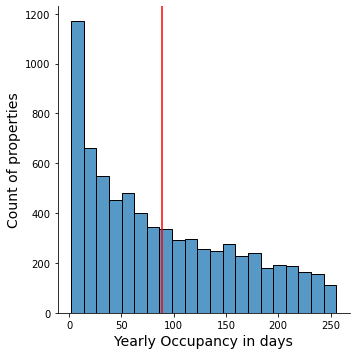

In [104]:

sns.displot(data=df, x="yearly_occupancy")
plt.xlabel("Yearly Occupancy in days", size=14)
plt.ylabel("Count of properties", size=14)
plt.axvline(x=df.yearly_occupancy.mean(),
            color='red')

### Conclusion

This gives us a good idea of what to expect, when renting a flat in Florence, we would probably aim for the mean value of ~89 billed nights.

This is actually very matching with the local laws, giving non-licensed owners the right of up to 90 nights a year for tourism rentals. (https://airbtics.com/airbnb-regulation-in-florence/).

### Additional Analyze - Are licenses a factor ?

We create 2 datasets, 1 with host who have license and 1 with the ones who don't

count    612.000000
mean      88.992066
std       70.976465
min        2.197692
25%       27.039044
50%       70.994089
75%      145.410468
max      254.651163
Name: yearly_occupancy, dtype: float64


<ipython-input-111-39de547c2a29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_license'][df['license'].isna() == False] = True


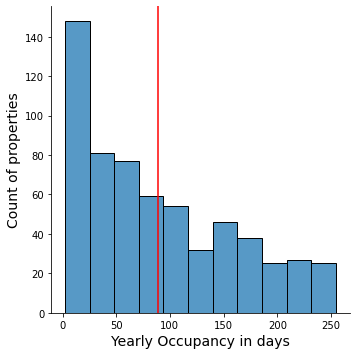

: 

In [111]:
#host who have license

df['has_license'] = False

df['has_license'][df['license'].isna() == False] = True

df_license = df[df['has_license']== True]
df_no_license = df[df['has_license']== False]


print(df_license['yearly_occupancy'].describe())

sns.displot(data=df_license, x="yearly_occupancy")
plt.xlabel("Yearly Occupancy in days", size=14)
plt.ylabel("Count of properties", size=14)
plt.axvline(x=df.yearly_occupancy.mean(),
            color='red')





count    6615.000000
mean       88.813646
std        71.170693
min         1.753403
25%        25.294575
50%        71.335505
75%       143.424193
max       255.500000
Name: yearly_occupancy, dtype: float64


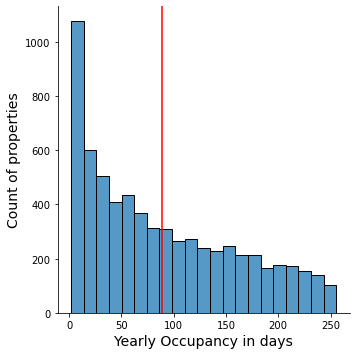

In [110]:
# Dataset of hosts who don't have a license

print(df_no_license['yearly_occupancy'].describe())

sns.displot(data=df_no_license, x="yearly_occupancy")
plt.xlabel("Yearly Occupancy in days", size=14)
plt.ylabel("Count of properties", size=14)
plt.axvline(x=df.yearly_occupancy.mean(),
            color='red')

This additional exploration prove to give a similar mean value, hence we can assume licensing has no real influence on occupancy rate.